# Database Example
In this notebook, we practice how to combine multiple tables using Pandas.  Then we do Exploratory Data Analysis on the combined dataframe to run complex queries.  

The data in this example is from a database example where there are 4 tables from a veterinary clinic.  There are tables with information about the Animals, Owners, Billing and Visits.   
We will combine the 4 tables as shown in the following diagram:

<img src="DatabaseSchema.png" alt="Alternative text" height="200px" align="center"/>

In [2]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in Animal, Billing, Owner, Visit Excel files.

In [3]:
Animal = pd.read_excel('Animal.xlsx')
Billing = pd.read_excel('Billing.xlsx')
Owner = pd.read_excel('Owner.xlsx')
Visit = pd.read_excel('Visit.xlsx')

Examining these files, we see that each has a *primary key*, which is the first column, that acts as an index. They also have a *foreign key* which we can use to synchronize one table with another.  The following column titles are the keys for the different tables:
* AnimalID
* OwnerID
* VisitID

In [4]:
Animal.head()

,AnimalID,OwnerID,AnimalName,AnimalBirthDate,AnimalType,AnimalBreed
0,12278,2412,Bailey,2013-05-09,Dog,Beagle
1,12282,2310,Whiskers,2014-04-10,Cat,Burmese
2,12286,2318,Lady,2015-08-12,Dog,Border collie
3,12290,2325,Rustle,2015-09-02,Dog,Australian shepherd
4,12294,2335,Bushy,2015-03-02,Cat,Himalayan


In [5]:
Billing.head()

,InvoiceNum,VisitID,InvoiceDate,InvoiceAmt,InvoiceItem,InvoicePaid
0,42098,1002,2016-11-09,50,Lab Work,True
1,42099,1002,2016-11-09,75,Updated shots,False
2,42100,1002,2016-11-09,45,Flea & tick medications,False
3,42110,1006,2016-11-14,35,Heartworm medication,True
4,42111,1006,2016-11-14,65,Updated shots,True


In [6]:
Owner.head()

,OwnerID,FirstName,LastName,Phone,Address,City,State,ZipCode,Email
0,2310,Bob,Jones,307-824-1245,12 Elm Ln,Cody,WY,82414,student@example.com
1,2314,Sally,Cruz,307-406-4321,199 18th Ave,Ralston,WY,82240,scruz@example.com
2,2318,Sandra,Pincher,307-982-8401,12 Rock Ln,Cody,WY,82414,sp231@example.com
3,2322,Billy,Ruffton,307-843-9810,21 Simple Cir,Garland,WY,82435,br299@example.com
4,2325,Barbara,Fishman,307-987-0092,2 Lakeview Rd,Cody,WY,82414,fishy@example.com


In [7]:
Visit.head()

,VisitID,AnimalID,VisitDate,Reason,Offsite
0,1002,12282,2016-11-08,Vaccinations,False
1,1006,12290,2016-11-11,Vaccinations,False
2,1009,12308,2016-11-15,Nail clipping and grooming,False
3,1012,12335,2016-11-18,Vaccinations,True
4,1013,12337,2016-11-18,Vaccinations,True


Combine the different tables using the different keys.  We're taking a sequential approach.

In [8]:
CombinedTable = Animal.merge(Owner, how='inner', on='OwnerID')
CombinedTable = CombinedTable.merge(Visit, how='inner', on='AnimalID')
CombinedTable = CombinedTable.merge(Billing, how='inner', on='VisitID')
CombinedTable.columns


Index(['AnimalID', 'OwnerID', 'AnimalName', 'AnimalBirthDate', 'AnimalType',
       'AnimalBreed', 'FirstName', 'LastName', 'Phone', 'Address', 'City',
       'State', 'ZipCode', 'Email', 'VisitID', 'VisitDate', 'Reason',
       'Offsite', 'InvoiceNum', 'InvoiceDate', 'InvoiceAmt', 'InvoiceItem',
       'InvoicePaid'],
      dtype='object')

Let's drop certain columns that are unique and don't have statistical value

In [9]:
# Drop some columns for brevity.  Removing State becaause all records are from WV
CombinedTable.drop(columns=['AnimalName','FirstName','LastName','Phone','Address','City','Email','Reason','InvoiceNum','State'],axis=1,inplace=True)
CombinedTable.head()

,AnimalID,OwnerID,AnimalBirthDate,AnimalType,AnimalBreed,ZipCode,VisitID,VisitDate,Offsite,InvoiceDate,InvoiceAmt,InvoiceItem,InvoicePaid
0,12278,2412,2013-05-09,Dog,Beagle,82414,1044,2017-01-20,False,2016-12-05,75,Updated shots,True
1,12278,2412,2013-05-09,Dog,Beagle,82414,1044,2017-01-20,False,2016-12-05,50,Lab work,True
2,12278,2412,2013-05-09,Dog,Beagle,82414,1044,2017-01-20,False,2016-12-05,45,Flea & tick medications,True
3,12278,2412,2013-05-09,Dog,Beagle,82414,1044,2017-01-20,False,2016-12-05,35,Heartworm medication,True
4,12278,2412,2013-05-09,Dog,Beagle,82414,1169,2017-02-01,False,2017-01-23,100,Spaying,False


In [10]:
CombinedTable.nunique()

AnimalID           56
OwnerID            22
AnimalBirthDate    55
AnimalType          6
AnimalBreed        28
ZipCode             5
VisitID            75
VisitDate          36
Offsite             2
InvoiceDate        36
InvoiceAmt         13
InvoiceItem        41
InvoicePaid         2
dtype: int64

Looking at the number of unique values in the columns above, we see that we can group under columns that have few unique values such as **AnimalType, ZipCode, Offsite, InvoicePaid".  Let's try this out.  

(array([11., 19., 97.,  1., 65.,  0.,  6.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 15.,  28.,  41.,  54.,  67.,  80.,  93., 106., 119., 132., 145.,
        158., 171., 184., 197., 210., 223., 236., 249., 262., 275.]),
 <BarContainer object of 20 artists>)

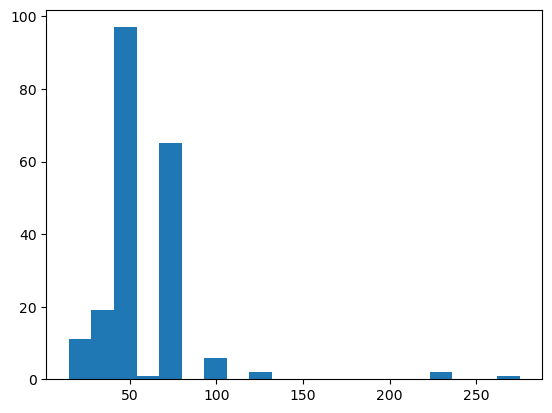

In [11]:
df = CombinedTable
plt.hist(df.loc[:,'InvoiceAmt'], bins=20)
# we see that most invoices are less than $100

<AxesSubplot:xlabel='InvoiceAmt', ylabel='Count'>

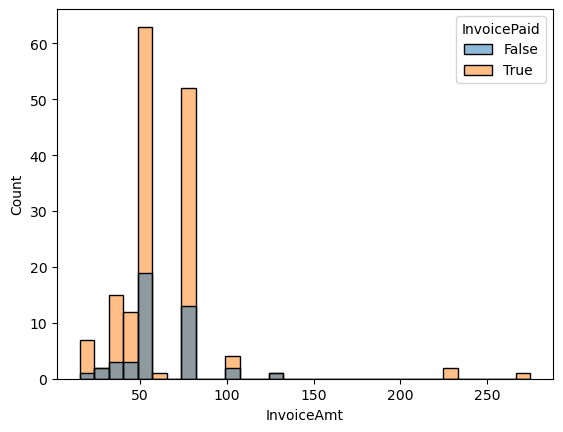

In [13]:
# Plot histograms of invoice amounts based on paid/not paid
sns.histplot(data=CombinedTable,x='InvoiceAmt',hue='InvoicePaid')

#plot shows not much separation between paid and not-paid invoices in terms of value.  
# This means that we're not seeing that unpaid invoices are of a higher amount than paid invoices.

<AxesSubplot:xlabel='InvoiceAmt', ylabel='Count'>

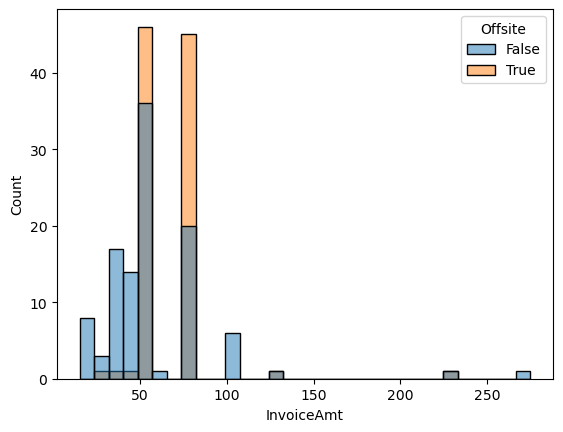

In [14]:
sns.histplot(data=CombinedTable,x='InvoiceAmt',hue='Offsite')
# Histograms show that invoices for offsite visits are not significantly higher or lower than onsite visits

### Complex Queries
With the combined table, we can now run more complex queries

In [62]:
# Which animals cost the most
df.groupby('AnimalType').mean().loc[:,'InvoiceAmt']

AnimalType
Bird      78.571429
Bison     61.538462
Cat       67.608696
Cattle    62.500000
Dog       53.209877
Sheep     60.000000
Name: InvoiceAmt, dtype: float64

In [70]:
# Are costs higher for older animals?
# 1. Group by year
# 2. Average cost
df.groupby(df.loc[:,'AnimalBirthDate'].dt.year).mean().loc[:,'InvoiceAmt']

AnimalBirthDate
2002    133.333333
2009     45.000000
2010     37.500000
2012     50.000000
2013     59.821429
2014     56.759259
2015     61.515152
Name: InvoiceAmt, dtype: float64

In [73]:
# 2002 animal is the oldest.  Let's see what those records look like
df.loc[df.loc[:,'AnimalBirthDate'].dt.year==2002,:]

,AnimalID,OwnerID,AnimalBirthDate,AnimalType,AnimalBreed,State,ZipCode,VisitID,VisitDate,Offsite,InvoiceDate,InvoiceAmt,InvoiceItem,InvoicePaid
85,12328,2354,2002-02-03,Bird,Lovebird,WY,82414,1020,2016-11-21,False,2016-11-22,275,Surgery for wing repair,True
86,12328,2354,2002-02-03,Bird,Lovebird,WY,82414,1020,2016-11-21,False,2016-11-22,50,Medications for recovery,True
87,12328,2354,2002-02-03,Bird,Lovebird,WY,82414,1020,2016-11-21,False,2016-11-22,75,Lab work,True


Same bird was seen 3 times, but one was very high for a broken wing, which drove up the average.  Also note that the 2 other invoice items appear related to that surgery as they are on the same day and same visitID.  